#📌 Extracão

##📦 1. Importar bibliotecas e carregar os dados


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

df = pd.read_json('/content/TelecomX_Data.json')

# Carregar o JSON
with open('TelecomX_Data.json', 'r') as f:
    data = json.load(f)

# Transformar dados aninhados em DataFrame
df = pd.json_normalize(data)
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 🔎 2. Verificar colunas e tipos de dados

In [ ]:
print(df.columns)
df.info()

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   i

#🔧 Transformação

## 🧹 3. Limpeza de dados


In [ ]:
# Renomear colunas
df = df.rename(columns={
    "Churn": "Evasao",
    "customer.gender": "Genero",
    "customer.SeniorCitizen": "Idoso",
    "customer.Partner": "Parceiro",
    "customer.Dependents": "Dependentes",
    "customer.tenure": "Meses_de_contrato",
    "phone.PhoneService": "Telefone_ativo",
    "phone.MultipleLines": "Multiplas_linhas",
    "internet.InternetService": "Tipo_Internet",
    "internet.OnlineSecurity": "Seguranca_Online",
    "internet.OnlineBackup": "Backup_Online",
    "internet.DeviceProtection": "Protecao_Dispositivo",
    "internet.TechSupport": "Suporte_Tecnico",
    "internet.StreamingTV": "Streaming_TV",
    "internet.StreamingMovies": "Streaming_Filmes",
    "account.Contract": "Tipo_Contrato",
    "account.PaperlessBilling": "Fatura_sem_papel",
    "account.PaymentMethod": "Metodo_pagamento",
    "account.Charges.Monthly": "Cobranca_Mensal",
    "account.Charges.Total": "Cobranca_Total"
})

# Substituir valores em colunas categóricas
df["Evasao"] = df["Evasao"].replace({"No": "nao", "Yes": "yes", "Unknown": "desconhecido"})
df["Genero"] = df["Genero"].replace({"Male": "masculino", "Female": "feminino"})
df["Parceiro"] = df["Parceiro"].replace({"No": "nao", "Yes": "yes"})
df["Dependentes"] = df["Dependentes"].replace({"No": "nao", "Yes": "yes"})
df["Telefone_ativo"] = df["Telefone_ativo"].replace({"No": "nao", "Yes": "yes"})
df["Multiplas_linhas"] = df["Multiplas_linhas"].replace({
    "No": "nao",
    "Yes": "yes",
    "No phone service": "sem servico telefonico"
})
df["Tipo_Internet"] = df["Tipo_Internet"].replace({
    "Fiber optic": "fibra otica",
    "No": "sem internet"
})
for col in [
    "Seguranca_Online", "Backup_Online", "Protecao_Dispositivo",
    "Suporte_Tecnico", "Streaming_TV", "Streaming_Filmes"
]:
    df[col] = df[col].replace({
        "No": "nao",
        "Yes": "yes",
        "No internet service": "sem servico de internet"
    })

df["Tipo_Contrato"] = df["Tipo_Contrato"].replace({
    "Month-to-month": "mensal",
    "Two year": "dois anos",
    "One year": "um ano"
})

df["Fatura_sem_papel"] = df["Fatura_sem_papel"].replace({"Yes": "yes", "No": "nao"})

df["Metodo_pagamento"] = df["Metodo_pagamento"].replace({
    "Electronic check": "cheque eletronico",
    "Mailed check": "cheque enviado",
    "Bank transfer (automatic)": "transferencia bancaria (automatica)",
    "Credit card (automatic)": "cartao de credito (automatico)"
})

# Manter apenas registros com evasão definida
df = df[df['Evasao'].isin(['yes', 'nao'])].copy()

# Converter 'Cobranca_Total' para número
df['Cobranca_Total'] = pd.to_numeric(df['Cobranca_Total'], errors='coerce').fillna(0)

# Remover coluna desnecessária
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

df


,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_de_contrato,Telefone_ativo,Multiplas_linhas,Tipo_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_sem_papel,Metodo_pagamento,Cobranca_Mensal,Cobranca_Total
0,nao,feminino,0,yes,yes,9,yes,nao,DSL,nao,yes,nao,yes,yes,nao,um ano,yes,cheque enviado,65.60,593.30
1,nao,masculino,0,nao,nao,9,yes,yes,DSL,nao,nao,nao,nao,nao,yes,mensal,nao,cheque enviado,59.90,542.40
2,yes,masculino,0,nao,nao,4,yes,nao,fibra otica,nao,nao,yes,nao,nao,nao,mensal,yes,cheque eletronico,73.90,280.85
3,yes,masculino,1,yes,nao,13,yes,nao,fibra otica,nao,yes,yes,nao,yes,yes,mensal,yes,cheque eletronico,98.00,1237.85
4,yes,feminino,1,yes,nao,3,yes,nao,fibra otica,nao,nao,nao,yes,yes,nao,mensal,yes,cheque enviado,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,nao,feminino,0,nao,nao,13,yes,nao,DSL,yes,nao,nao,yes,nao,nao,um ano,nao,cheque enviado,55.15,742.90
7263,yes,masculino,0,yes,nao,22,yes,yes,fibra otica,nao,nao,nao,nao,nao,yes,mensal,yes,cheque eletronico,85.10,1873.70
7264,nao,masculino,0,nao,nao,2,yes,nao,DSL,nao,yes,nao,nao,nao,nao,mensal,yes,cheque enviado,50.30,92.75
7265,nao,masculino,0,yes,yes,67,yes,nao,DSL,yes,nao,yes,yes,nao,yes,dois anos,nao,cheque enviado,67.85,4627.65


##🔄 4. Padronizar colunas “Sim/Não” para 1/0

In [ ]:
# Converter Evasao para binário
df['Evasao'] = df['Evasao'].map({'yes': 1, 'nao': 0})

# Lista de colunas binárias já renomeadas
colunas_binarias = [
    'Parceiro', 'Dependentes', 'Telefone_ativo', 'Multiplas_linhas',
    'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
    'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes',
    'Fatura_sem_papel'
]

# Função de binarização
def binarizar(col):
    return col.replace({
        'yes': 1,
        'nao': 0,
        'sem servico telefonico': 0,
        'sem servico de internet': 0
    })

# Aplicar binarização de forma segura
for col in colunas_binarias:
    if col in df.columns:
        df[col] = binarizar(df[col])
    else:
        print(f"Coluna não encontrada: {col}")

# Calcular valor diário da cobrança
df['Contas_Diarias'] = (df['Cobranca_Mensal'] / 30).round(2)

# Visualizar resultado
df

/tmp/ipython-input-5-170396276.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return col.replace({


,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_de_contrato,Telefone_ativo,Multiplas_linhas,Tipo_Internet,Seguranca_Online,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_sem_papel,Metodo_pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,0,feminino,0,1,1,9,1,0,DSL,0,...,0,1,1,0,um ano,1,cheque enviado,65.60,593.30,2.19
1,0,masculino,0,0,0,9,1,1,DSL,0,...,0,0,0,1,mensal,0,cheque enviado,59.90,542.40,2.00
2,1,masculino,0,0,0,4,1,0,fibra otica,0,...,1,0,0,0,mensal,1,cheque eletronico,73.90,280.85,2.46
3,1,masculino,1,1,0,13,1,0,fibra otica,0,...,1,0,1,1,mensal,1,cheque eletronico,98.00,1237.85,3.27
4,1,feminino,1,1,0,3,1,0,fibra otica,0,...,0,1,1,0,mensal,1,cheque enviado,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,feminino,0,0,0,13,1,0,DSL,1,...,0,1,0,0,um ano,0,cheque enviado,55.15,742.90,1.84
7263,1,masculino,0,1,0,22,1,1,fibra otica,0,...,0,0,0,1,mensal,1,cheque eletronico,85.10,1873.70,2.84
7264,0,masculino,0,0,0,2,1,0,DSL,0,...,0,0,0,0,mensal,1,cheque enviado,50.30,92.75,1.68
7265,0,masculino,0,1,1,67,1,0,DSL,1,...,1,1,0,1,dois anos,0,cheque enviado,67.85,4627.65,2.26


## 💸 5. Criar coluna “Contas_Diarias”



In [ ]:
df['Contas_Diarias'] = (df['Cobranca_Mensal'] / 30).round(2)
df[['Cobranca_Mensal', 'Contas_Diarias']].head()


,Cobranca_Mensal,Contas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


#📊 Carga e análise

## Análise Descritiva das Variáveis Numéricas

In [ ]:
# Estatísticas descritivas
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Evasao,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00
Idoso,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Parceiro,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
Dependentes,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
Meses_de_contrato,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
Telefone_ativo,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
Multiplas_linhas,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00
Seguranca_Online,7043.0,0.286668,0.452237,0.00,0.00,0.00,1.00,1.00
Backup_Online,7043.0,0.344881,0.475363,0.00,0.00,0.00,1.00,1.00
Protecao_Dispositivo,7043.0,0.343888,0.475038,0.00,0.00,0.00,1.00,1.00


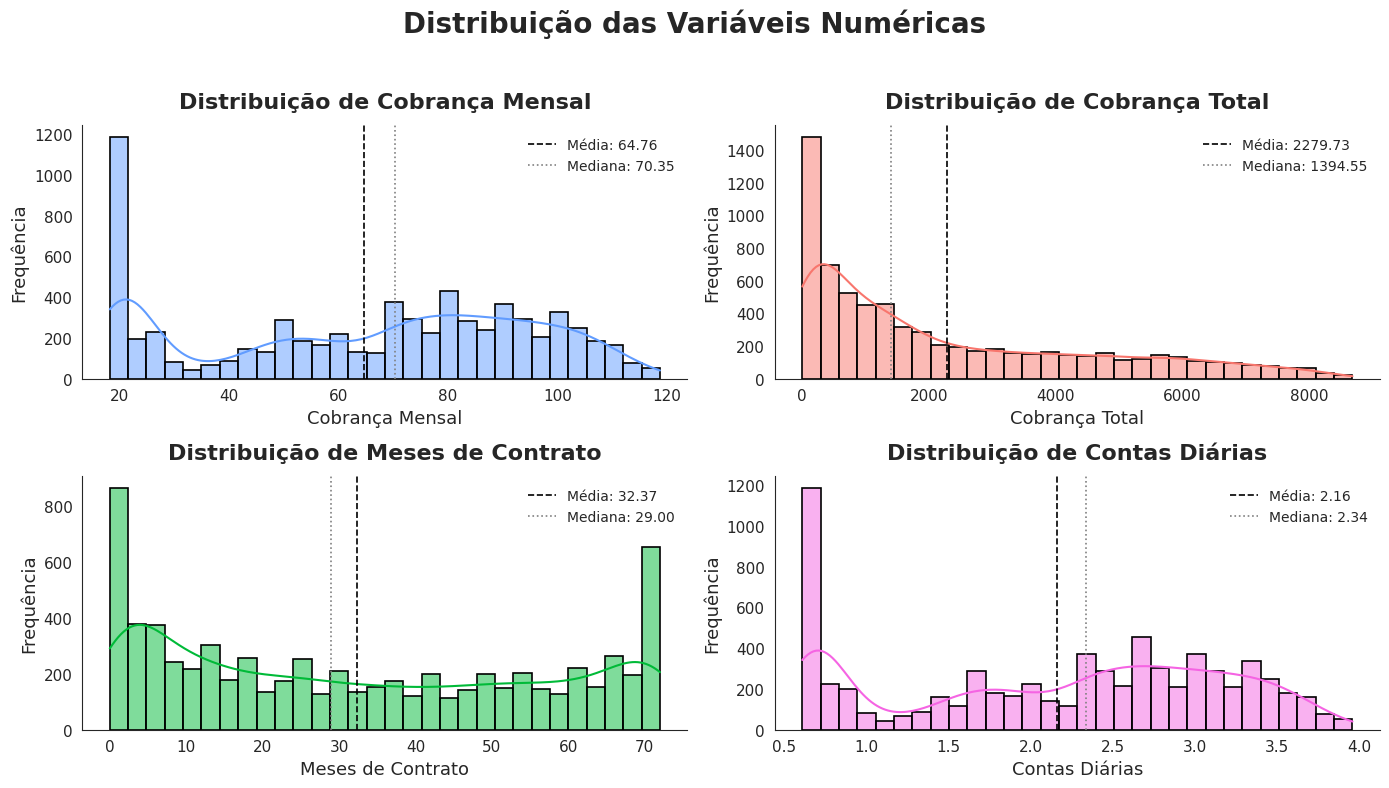

In [ ]:
# Estilo clean e elegante
sns.set_style('white')
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 13,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 10,
    'figure.titlesize': 20,
    'font.family': 'sans-serif',
    'font.sans-serif': 'DejaVu Sans'
})

# Variáveis e cores
numericas = ['Cobranca_Mensal', 'Cobranca_Total', 'Meses_de_contrato', 'Contas_Diarias']
titulos = ['Cobrança Mensal', 'Cobrança Total', 'Meses de Contrato', 'Contas Diárias']
cores_elegantes = ['#619CFF', '#F8766D', '#00BA38', '#F564E3']

# Subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.ravel()

for i, col in enumerate(numericas):
    sns.histplot(
        data=df,
        x=col,
        bins=30,
        kde=True,
        color=cores_elegantes[i],
        edgecolor='black',  # mais visível
        linewidth=1.2,
        ax=axes[i]
    )

    # Linhas de média e mediana
    media = df[col].mean()
    mediana = df[col].median()
    axes[i].axvline(media, color='black', linestyle='--', linewidth=1.2, label=f'Média: {media:.2f}')
    axes[i].axvline(mediana, color='gray', linestyle=':', linewidth=1.2, label=f'Mediana: {mediana:.2f}')

    # Título e rótulos dos eixos
    axes[i].set_title(f'Distribuição de {titulos[i]}', fontweight='bold', pad=12)
    axes[i].set_xlabel(titulos[i])
    axes[i].set_ylabel('Frequência')

    # Legenda sem caixa
    axes[i].legend(loc='upper right', frameon=False)

    # Remove as bordas superior e direita
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

# Título geral
fig.suptitle('Distribuição das Variáveis Numéricas', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 📉 Distribuição da Evasão (Churn)

/tmp/ipython-input-9-883476540.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Evasao', palette=cores_barras, edgecolor='black', linewidth=1.2)
/tmp/ipython-input-9-883476540.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Permaneceu', 'Evasão'], fontsize=12)


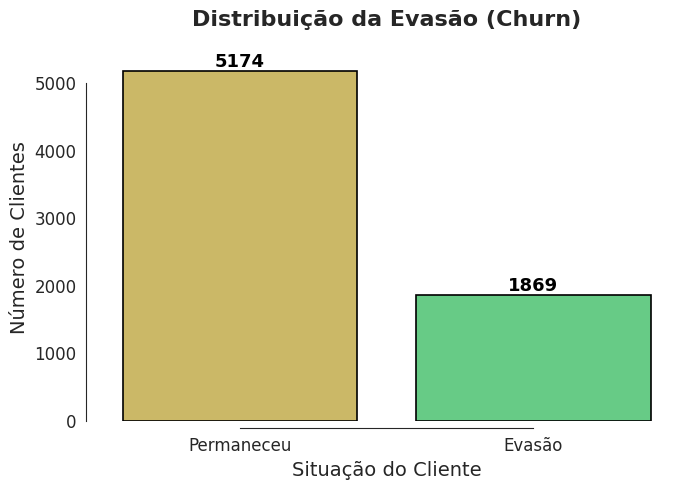

In [ ]:
# Configurações de estilo
sns.set_style("white")
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': 'sans-serif',
    'font.sans-serif': 'DejaVu Sans',
})

# Paleta de cores (exemplo com hls)
paleta = sns.color_palette("hls", 8)  # 8 cores no total
cores_barras = [paleta[1], paleta[3]]  # Peguei duas cores harmônicas para os dois grupos

# --- Gráfico de barras ---
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df, x='Evasao', palette=cores_barras, edgecolor='black', linewidth=1.2)

# Anotações com fonte elegante e maior
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=13,
        fontweight='semibold',
        color='black'
    )

ax.set_title("Distribuição da Evasão (Churn)", fontweight='bold', pad=20)
ax.set_xlabel("Situação do Cliente", fontsize=14)
ax.set_ylabel("Número de Clientes", fontsize=14)
ax.set_xticklabels(['Permaneceu', 'Evasão'], fontsize=12)

sns.despine(trim=True, offset=5)
plt.tight_layout()
plt.show()

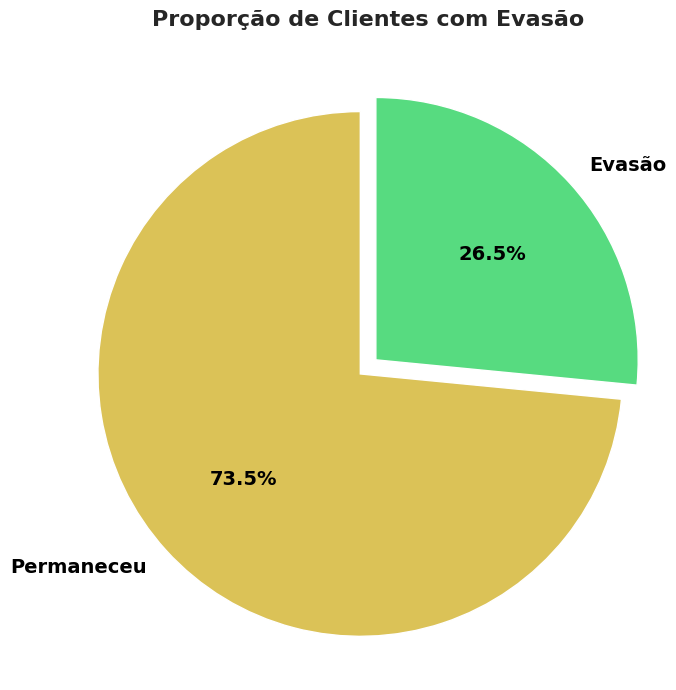

In [ ]:
# --- Gráfico de pizza ---
evasao_proporcao = df['Evasao'].value_counts(normalize=True)

plt.figure(figsize=(7, 7))
plt.pie(
    evasao_proporcao,
    labels=['Permaneceu', 'Evasão'],
    autopct='%1.1f%%',
    startangle=90,
    colors=cores_barras,
    explode=[0, 0.08],
    shadow=False,
    textprops={'fontsize': 14, 'weight': 'semibold', 'color': 'black'}
)
plt.title('Proporção de Clientes com Evasão', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

## 👤 Evasão por Variáveis Categóricas

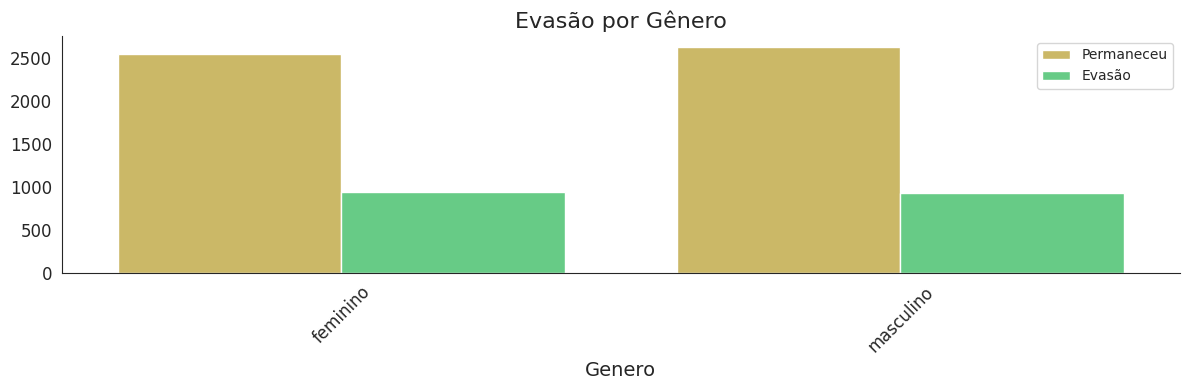

In [ ]:
paleta = sns.color_palette("hls", 8)
cores_barras = [paleta[1], paleta[3]]  # cores para "Permaneceu" e "Evasão"

plt.figure(figsize=(12,4))
ax = sns.countplot(data=df, x='Genero', hue='Evasao', palette=cores_barras)
ax.set_ylabel('')
plt.title("Evasão por Gênero")
plt.xticks(rotation=45)
plt.legend(title='', labels=['Permaneceu', 'Evasão'])
sns.despine()
plt.tight_layout()
plt.show()


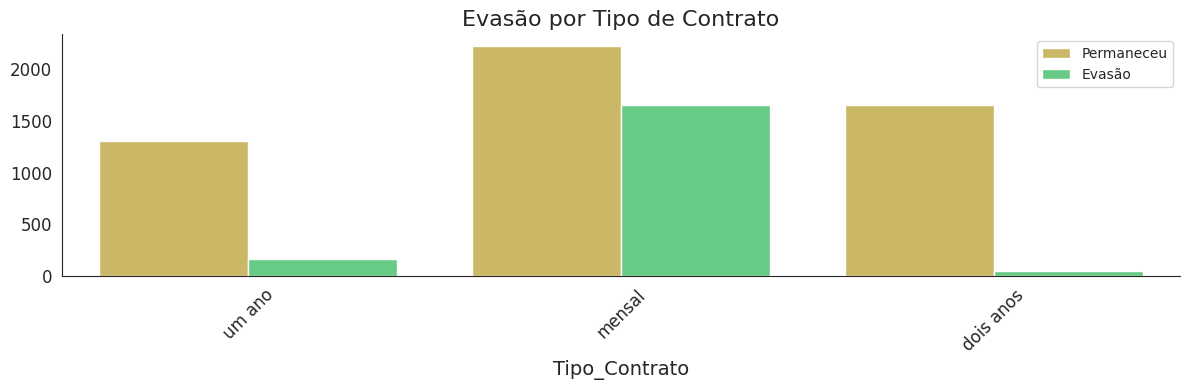

In [ ]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data=df, x='Tipo_Contrato', hue='Evasao', palette=cores_barras)
ax.set_ylabel('')
plt.title("Evasão por Tipo de Contrato")
plt.xticks(rotation=45)
plt.legend(title='', labels=['Permaneceu', 'Evasão'])
sns.despine()
plt.tight_layout()
plt.show()


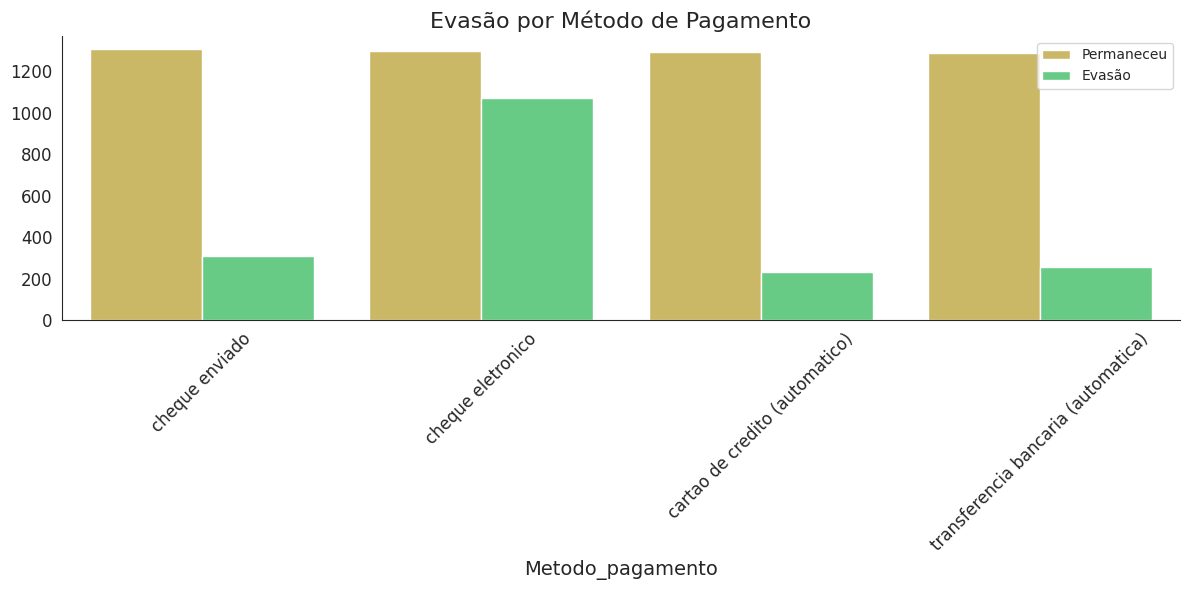

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='Metodo_pagamento', hue='Evasao', palette=cores_barras)
ax.set_ylabel('')
plt.title("Evasão por Método de Pagamento")
plt.xticks(rotation=45)
plt.legend(title='', labels=['Permaneceu', 'Evasão'])
sns.despine()
plt.tight_layout()
plt.show()


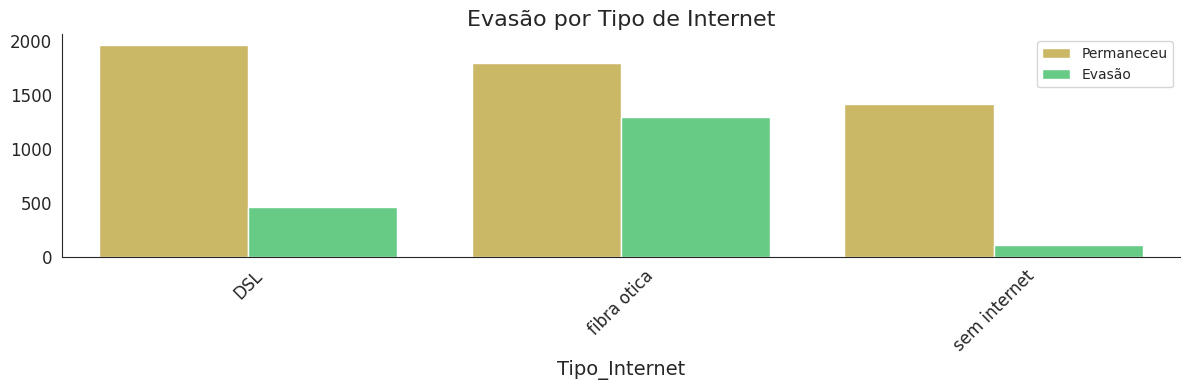

In [ ]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data=df, x='Tipo_Internet', hue='Evasao', palette=cores_barras)
ax.set_ylabel('')
plt.title("Evasão por Tipo de Internet")
plt.xticks(rotation=45)
plt.legend(title='', labels=['Permaneceu', 'Evasão'])
sns.despine()
plt.tight_layout()
plt.show()


## 📈 Variáveis Numéricas x Evasão


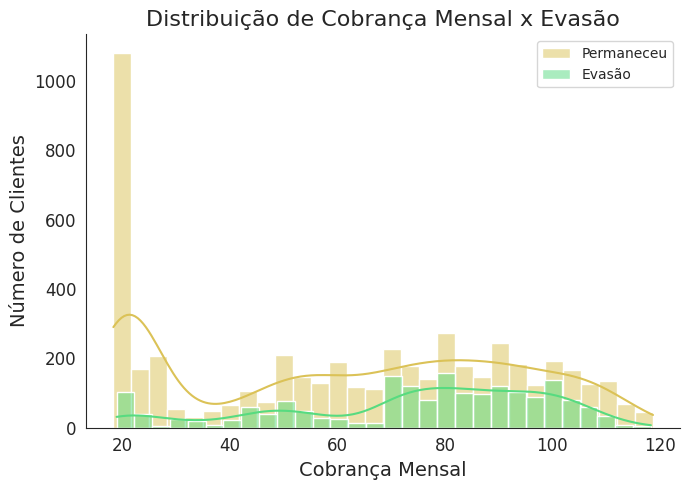

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df[df['Evasao']==0]['Cobranca_Mensal'], color=cores_barras[0], label='Permaneceu', kde=True, stat='count', bins=30, alpha=0.5)
sns.histplot(df[df['Evasao']==1]['Cobranca_Mensal'], color=cores_barras[1], label='Evasão', kde=True, stat='count', bins=30, alpha=0.5)
plt.title('Distribuição de Cobrança Mensal x Evasão')
plt.xlabel('Cobrança Mensal')
plt.ylabel('Número de Clientes')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


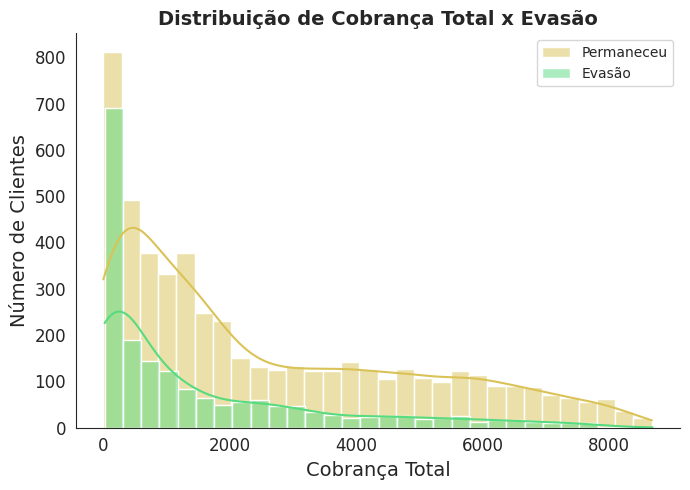

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df[df['Evasao']==0]['Cobranca_Total'], color=cores_barras[0], label='Permaneceu', kde=True, stat='count', bins=30, alpha=0.5)
sns.histplot(df[df['Evasao']==1]['Cobranca_Total'], color=cores_barras[1], label='Evasão', kde=True, stat='count', bins=30, alpha=0.5)
plt.title('Distribuição de Cobrança Total x Evasão', fontsize=14, fontweight='bold')
plt.xlabel('Cobrança Total')
plt.ylabel('Número de Clientes')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


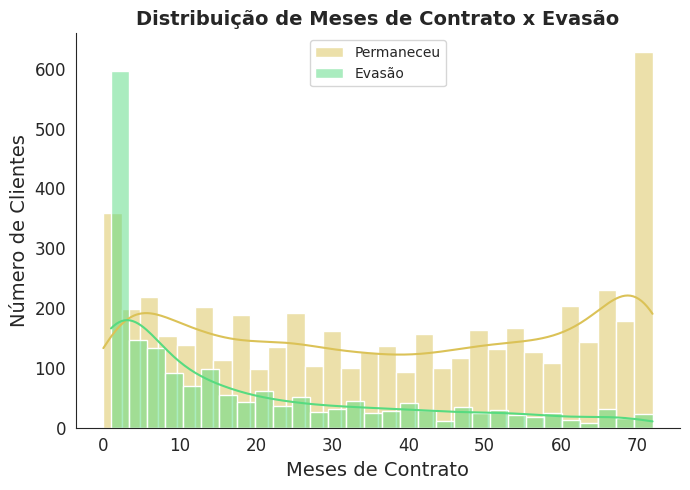

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df[df['Evasao']==0]['Meses_de_contrato'], color=cores_barras[0], label='Permaneceu', kde=True, stat='count', bins=30, alpha=0.5)
sns.histplot(df[df['Evasao']==1]['Meses_de_contrato'], color=cores_barras[1], label='Evasão', kde=True, stat='count', bins=30, alpha=0.5)
plt.title('Distribuição de Meses de Contrato x Evasão', fontsize=14, fontweight='bold')
plt.xlabel('Meses de Contrato')
plt.ylabel('Número de Clientes')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


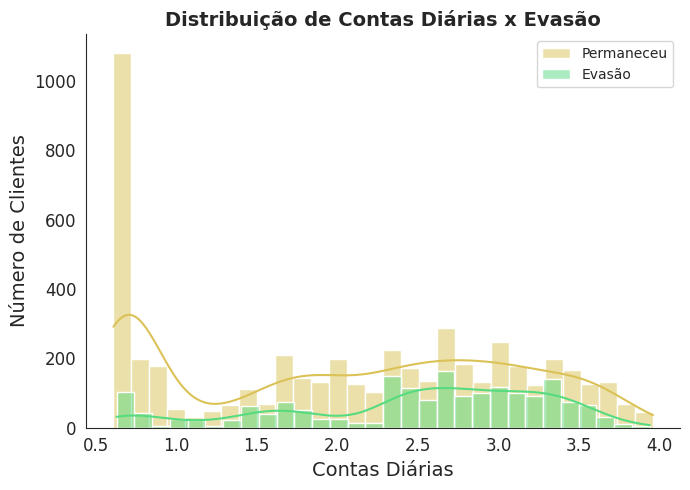

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df[df['Evasao']==0]['Contas_Diarias'], color=cores_barras[0], label='Permaneceu', kde=True, stat='count', bins=30, alpha=0.5)
sns.histplot(df[df['Evasao']==1]['Contas_Diarias'], color=cores_barras[1], label='Evasão', kde=True, stat='count', bins=30, alpha=0.5)
plt.title('Distribuição de Contas Diárias x Evasão', fontsize=14, fontweight='bold')
plt.xlabel('Contas Diárias')
plt.ylabel('Número de Clientes')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


## 🔁 Correlação entre Variáveis

/tmp/ipython-input-19-3232000671.py:34: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


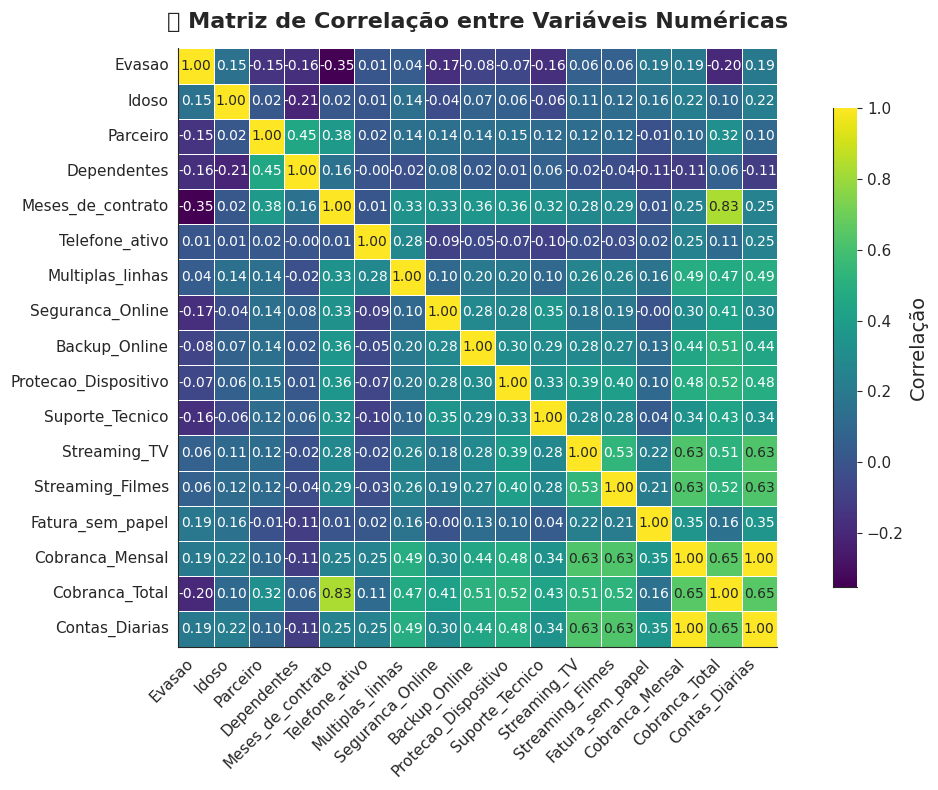

In [ ]:
# Calcular a correlação
correlacao = df.corr(numeric_only=True)

# Paleta viridis (como colormap)
cmap_viridis = sns.color_palette("viridis", as_cmap=True)

# Estilo limpo
sns.set_style("white")
plt.rcParams.update({
    'axes.titlesize': 16,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'font.family': 'sans-serif',
    'font.sans-serif': 'DejaVu Sans'
})

# Gráfico
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlacao,
    annot=True,
    fmt=".2f",
    cmap=cmap_viridis,
    linewidths=0.4,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlação'}
)

plt.title("🔁 Matriz de Correlação entre Variáveis Numéricas", fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
sns.despine()
plt.tight_layout()
plt.show()


/tmp/ipython-input-20-3572038701.py:29: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


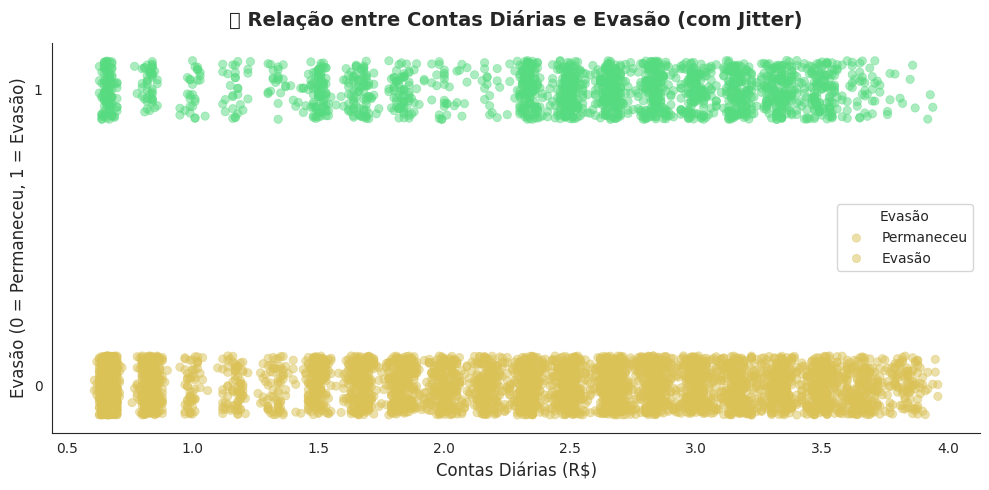

In [ ]:
# Definir paleta hls e escolher duas cores específicas
paleta = sns.color_palette("hls", 8)
cores_barras = [paleta[1], paleta[3]]  # Evasao: 0 = paleta[1], 1 = paleta[3]

# Adicionar jitter ao eixo y (evasão)
y_jitter = df['Evasao'] + np.random.uniform(-0.1, 0.1, size=len(df))

# Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=df['Contas_Diarias'],
    y=y_jitter,
    hue=df['Evasao'],
    palette=cores_barras,
    alpha=0.5,
    edgecolor=None,
    legend=True
)

# Estilo e rótulos
plt.title("📈 Relação entre Contas Diárias e Evasão (com Jitter)", fontsize=14, fontweight='bold', pad=12)
plt.xlabel("Contas Diárias (R$)", fontsize=12)
plt.ylabel("Evasão (0 = Permaneceu, 1 = Evasão)", fontsize=12)
plt.yticks([0, 1])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Evasão', labels=['Permaneceu', 'Evasão'])
sns.despine()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 89.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 88.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


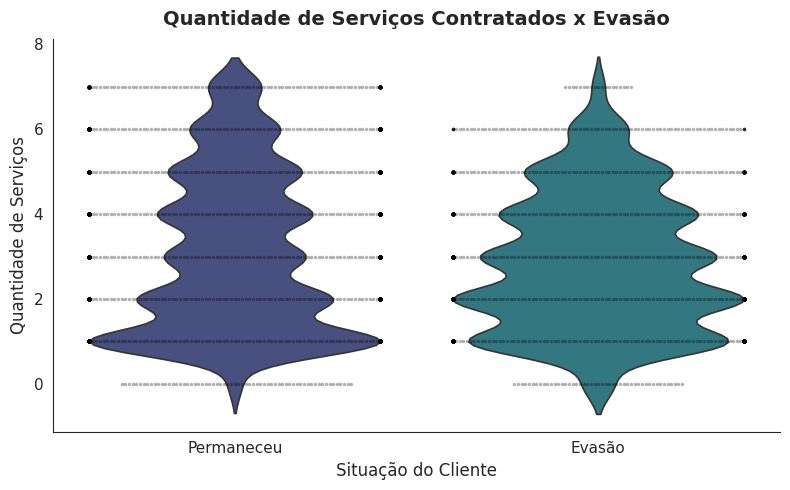

In [ ]:
colunas_servicos = [
    'Telefone_ativo',
    'Multiplas_linhas',
    'Seguranca_Online',
    'Protecao_Dispositivo',
    'Suporte_Tecnico',
    'Streaming_TV',
    'Streaming_Filmes'
]

df['Qtd_Servicos'] = df[colunas_servicos].sum(axis=1)

# Paleta personalizada
paleta = sns.color_palette("viridis", 8)
cores_servicos = [paleta[1], paleta[3]]  # Evasão: 0 e 1

plt.figure(figsize=(8, 5))

# Correção: adicionar hue e legend=False
sns.violinplot(
    data=df, x='Evasao', y='Qtd_Servicos',
    hue='Evasao', palette=cores_servicos,
    inner=None, legend=False
)

# Swarmplot para pontos individuais
sns.swarmplot(data=df, x='Evasao', y='Qtd_Servicos', color='k', size=2.5, alpha=0.3)

# Estilo e rótulos
plt.title("Quantidade de Serviços Contratados x Evasão", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Situação do Cliente", fontsize=12)
plt.ylabel("Quantidade de Serviços", fontsize=12)
plt.xticks([0, 1], ['Permaneceu', 'Evasão'])
sns.despine()
plt.tight_layout()
plt.show()


#📄Relatorio Final

# Análise de Evasão de Clientes (Churn) – Projeto Telecom X

## 📌 1. Introdução

O presente relatório tem como objetivo analisar os dados da empresa **Telecom X**, uma operadora de telecomunicações que vem enfrentando altos índices de evasão de clientes (churn). A missão é entender os padrões de comportamento dos clientes, identificar fatores que influenciam a decisão de cancelamento e, com isso, fornecer insights valiosos à equipe de ciência de dados.

Essa análise faz parte de um processo de **ETL (Extração, Transformação e Análise)**, essencial para preparar os dados e permitir que modelos preditivos sejam construídos com maior eficiência no futuro.

---

## 🧼 2. Limpeza e Tratamento de Dados

Após extrair os dados via API (arquivo JSON fornecido), foram realizadas as seguintes etapas:

- **Normalização de dados aninhados:** Utilização do `json_normalize` para transformar os dados em formato tabular.
- **Renomeação de colunas:** Para melhorar a legibilidade e padronização, colunas foram renomeadas para o português.
- **Tradução de categorias:** Termos em inglês foram traduzidos para português (ex: `Yes` → `yes`, `No` → `nao`).
- **Conversão de tipos:** A coluna `Cobranca_Total` foi convertida para tipo numérico, com tratamento de valores nulos.
- **Filtro de dados relevantes:** Registros com evasão desconhecida foram removidos.
- **Binarização de colunas:** Categorias `yes`/`nao` e “sem serviço” foram convertidas em `1` e `0`.
- **Criação de colunas derivadas:**
  - `Contas_Diarias`: valor médio diário de cobrança.
  - `Qtd_Servicos`: total de serviços contratados por cliente.

Essas etapas garantiram a consistência e qualidade dos dados para a análise exploratória.

---

## 📊 3. Análise Exploratória de Dados (EDA)

### 📈 3.1 Análise Descritiva

As variáveis numéricas foram analisadas com histogramas e medidas estatísticas (média, mediana, desvio padrão):

- Clientes com **maior tempo de contrato** tendem a permanecer mais.
- Cobranças mensais elevadas aparecem associadas a evasão.

### 🔁 3.2 Distribuição da Evasão (Churn)

- **Gráfico de barras** mostrou a contagem absoluta de clientes que permaneceram vs. evadiram.
- **Gráfico de pizza** mostrou que cerca de **27%** dos clientes cancelaram o serviço.

### 📊 3.3 Evasão por Variáveis Categóricas

Foi analisada a relação da evasão com variáveis como:

- **Gênero**: distribuição equilibrada entre homens e mulheres.
- **Tipo de contrato**: contratos mensais tiveram maior evasão.
- **Método de pagamento**: maior evasão entre usuários de **cheque eletrônico**.
- **Tipo de internet**: clientes sem internet apresentaram menor churn.

### 📦 3.4 Evasão por Variáveis Numéricas

Foram usados boxplots para comparar:

- **Cobranca_Mensal e Total**: clientes que evadiram tendem a ter cobrança mais alta.
- **Meses_de_contrato**: os que permaneceram geralmente têm mais tempo de vínculo.
- **Contas_Diarias**: valores mais altos se correlacionam levemente com maior churn.

### 📌 3.5 Correlação entre Variáveis

- A matriz de correlação revelou que:
  - `Qtd_Servicos` tem **ligação negativa** com evasão (quanto mais serviços, menor churn).
  - `Contas_Diarias` e `Cobranca_Mensal` têm **correlação positiva** com churn.

### 🎯 3.6 Relações Individuais

- **Dispersão com jitter** entre `Contas_Diarias` e `Evasao` evidenciou que valores maiores de cobrança diária ocorrem mais em clientes que cancelaram.
- A variável `Qtd_Servicos` mostrou forte ligação com permanência.

---

## ✅ 4. Conclusões e Insights

- A evasão está associada principalmente a **cobranças mais altas** e **contratos mensais**.
- Clientes que contratam **menos serviços** têm maior propensão a cancelar.
- **Métodos de pagamento automáticos** tendem a reduzir churn.
- **Tempo de contrato** é um fator importante de retenção.
- O perfil típico do cliente que evadiu envolve cobrança alta, poucos serviços e contrato mensal.

---

## 💡 5. Recomendações

Com base nas análises, sugiro:

1. **Oferecer pacotes promocionais com mais serviços** para incentivar a fidelização.
2. **Incentivar contratos anuais ou bienais** com descontos progressivos.
3. **Estudar a política de cobrança**: reduzir a cobrança mensal de clientes em risco pode ser eficaz.
4. **Migrar clientes para métodos de pagamento automáticos**, como débito automático.
5. **Implementar ações de retenção segmentadas** para perfis com alto risco de evasão.

---

✅ Com este relatório, entrego uma base sólida para a equipe de Data Science prosseguir com a modelagem preditiva, agora com dados limpos, padronizados e analisados com profundidade.